#  Automated Book Publication Workflow

This project demonstrates a semi-automated publishing workflow using AI and human collaboration. It features:
- Web scraping and screenshots from Wikisource
- AI-based chapter spinning using Hugging Face
- Human-in-the-loop editing and review
- Content versioning with ChromaDB
- Intelligent search with reinforcement learning-inspired scoring

Developed in Python, fully runnable in Google Colab.


In [ ]:
!pip install playwright
!playwright install


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 19.2 MB/s eta 0:00:00
167.7 MiB [] 0% 0.0s167.7 MiB [] 0% 9.1s167.7 MiB [] 0% 5.5s167.7 MiB [] 1% 4.0s167.7 MiB [] 1% 3.2s167.7 MiB [] 2% 2.8s167.7 MiB [] 3% 2.5s167.7 MiB [] 4% 2.3s167.7 MiB [] 5% 2.1s167.7 MiB [] 5% 2.3s167.7 MiB [] 6% 2.2s167.7 MiB [] 7% 2.2s167.7 MiB [] 8% 2.1s167.7 MiB [] 9% 2.1s167.7 MiB [] 10% 2.1s167.7 MiB [] 11% 2.0s167.7 MiB [] 12% 2.0s167.7 MiB [] 13% 1.9s167.7 MiB [] 14% 1.8s167.7 MiB [] 15% 1.7s167.7 MiB [] 16% 1.7s167.7 MiB [] 17% 1.6s167.7 MiB [] 19% 1.6s167.7 MiB [] 20% 1.5s167.7 MiB [] 21% 1.4s167.7 MiB [] 22% 1.4s167.7 MiB [] 22% 1.5s167.7 MiB [] 23% 1.5s167.7 MiB [] 24% 1.4s167.7 MiB [] 26% 1.4s167.7 MiB [] 28% 1.4s167.7 MiB [] 29% 1.3s167.7 MiB [] 30% 1.3s167.7 MiB [] 30% 1.4s167.7 MiB [] 31% 1.4s167.7 MiB [] 31% 1.3s167.7 MiB [] 32% 1.3s167.7 MiB [] 33% 1.3s167.7 MiB [] 34% 1.3s167.7 MiB [] 35% 1.3s167.7 MiB [] 36% 1.2s167.7 MiB [] 37% 1.2s167.7 MiB [] 38% 1.2s167.7 MiB [] 40% 1.1s167.7 MiB [

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install nest_asyncio
!pip install beautifulsoup4 chromadb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.0 MB/s eta 0:

In [ ]:
import nest_asyncio
import asyncio

nest_asyncio.apply()


In [ ]:
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
from IPython.display import Image, display

URL = "https://en.wikisource.org/wiki/The_Gates_of_Morning/Book_1/Chapter_1"
screenshot_path = "/content/chapter1.png"

async def fetch_and_screenshot():
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        await page.goto(URL)
        await page.screenshot(path=screenshot_path, full_page=True)
        content = await page.content()
        await browser.close()
        return content


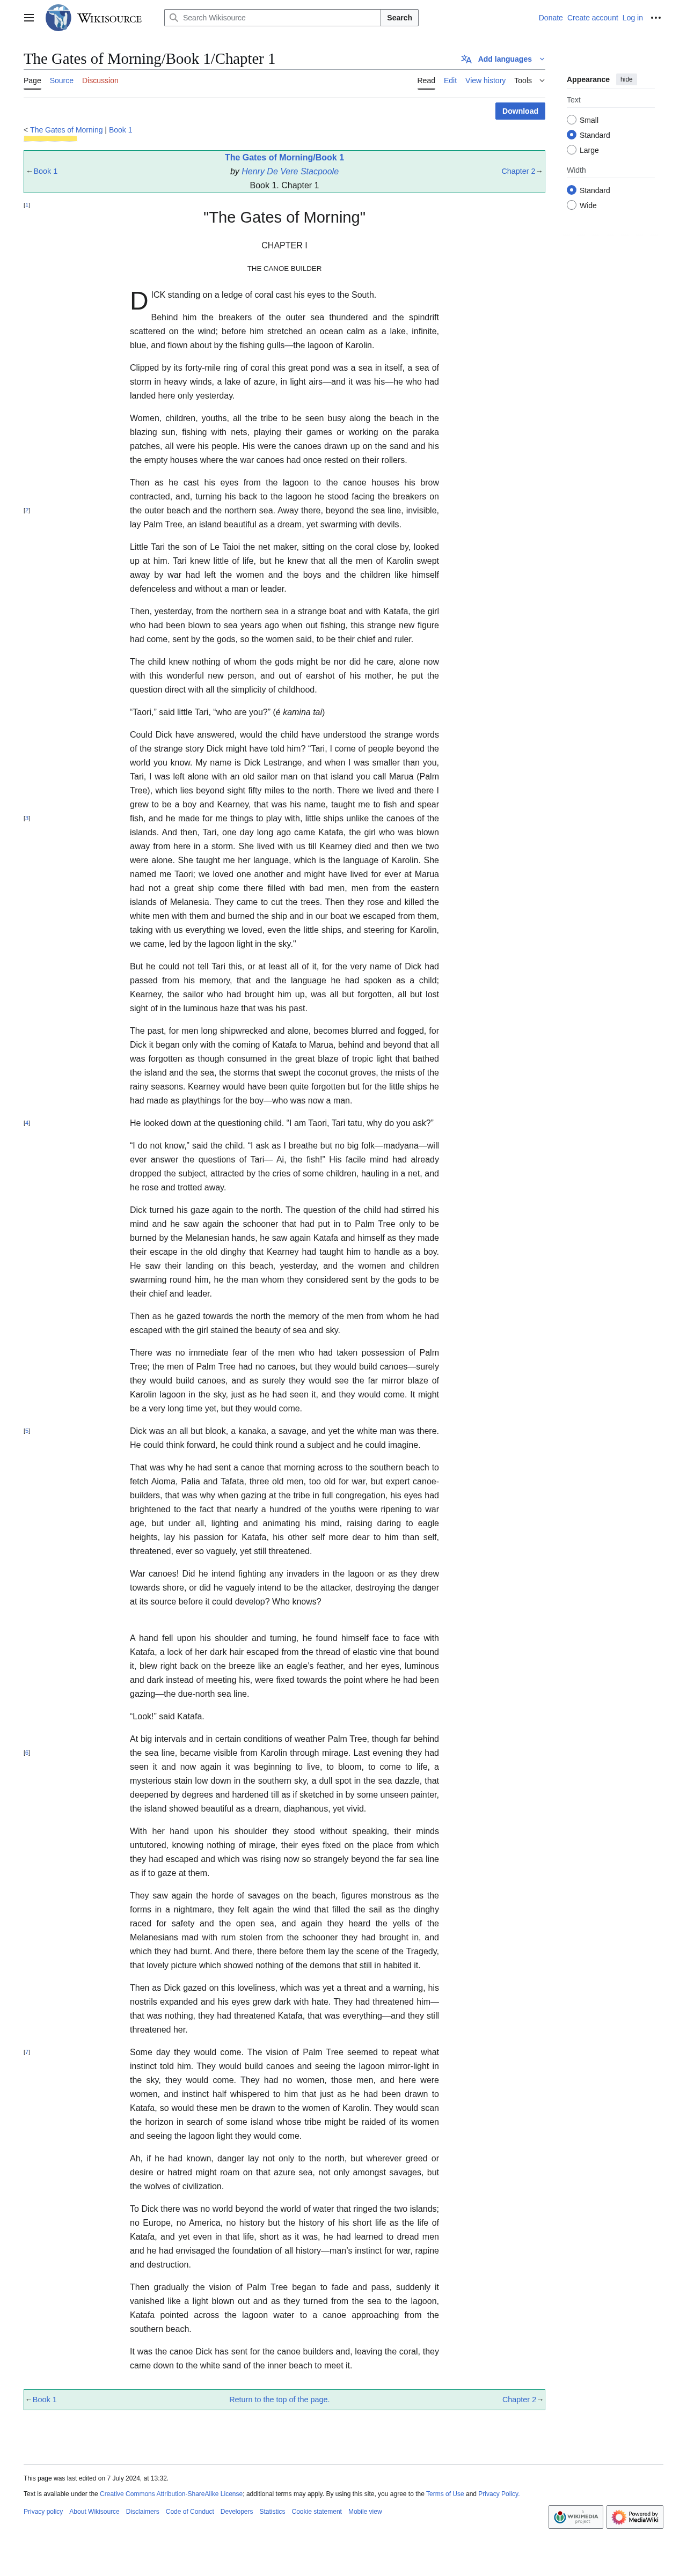

In [ ]:
html_content = await fetch_and_screenshot()
display(Image(filename=screenshot_path))


In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, "html.parser")

# Wikisource main content is typically inside <div id="mw-content-text">
content_div = soup.find("div", id="mw-content-text")

# Clean and join all paragraphs
paragraphs = content_div.find_all("p")
chapter_text = "\n\n".join([para.get_text(strip=True) for para in paragraphs if para.get_text(strip=True)])

print("📖 Extracted Chapter Text:\n")
print(chapter_text[:1000])  # Preview the first 1000 characters


📖 Extracted Chapter Text:

"The Gates of Morning"

CHAPTER I

THE CANOE BUILDER

DICK standing on a ledge of coral cast his eyes to the South.

Behind him the breakers of the outer sea thundered and the spindrift scattered on the wind; before him stretched an ocean calm as a lake, infinite, blue, and flown about by the fishing gulls—the lagoon of Karolin.

Clipped by its forty-mile ring of coral this great pond was a sea in itself, a sea of storm in heavy winds, a lake of azure, in light airs—and it was his—he who had landed here only yesterday.

Women, children, youths, all the tribe to be seen busy along the beach in the blazing sun, fishing with nets, playing their games or working on the paraka patches, all were his people. His were the canoes drawn up on the sand and his the empty houses where the war canoes had once rested on their rollers.

Then as he cast his eyes from the lagoon to the canoe houses his brow contracted, and, turning his back to the lagoon he stood facing the br

##  AI Writer – Chapter Spinning

The original chapter is rephrased ("spun") using a Hugging Face Transformer (`gpt2`) to simulate an AI writing assistant. This is the first draft that will later go through human and AI review.


In [ ]:
!pip install transformers sentencepiece

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "Vamsi/T5_Paraphrase_Paws"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [16]:
spun_version = spin_chapter(chapter_text)
print("🌀 Spun Chapter:\n")
print(spun_version)


🌀 Spun Chapter:

"The Gates of Morning" CHAPTER I THE CANOE BUILDER DICK stood on a ledge of coral and the spindrift scattered on the wind; before him stretched an ocean calm as a lake, infinite, blue and flown by the fishing gulls—the lagoon of Karolin. Clipped by its forty-mile ring of coral this great pond was a sea in itself, a sea of storm in heavy winds, a lake of azure, in light air His were the canoes drawn up on the sand and his empty houses where the war canoes had once rested on their rollers, then as he cast his eyes from the lagoon to the canoe houses his brow contracted and turned his back to the lagoon he stood facing the breakers on the outer beach and the northern sea . Away from the sea line, invisible, lay Palm Tree, an island beautiful as a dream, yet swarming with devils. Little Tari the son of Le Taioi the net maker, sitting on the coral close by, looked up at him Tari knew little of life, but he knew that all the men of Karolin swept away by war had left the wome

In [17]:
!pip install chromadb

/usr/lib/python3.11/pathlib.py:542: RuntimeWarning: coroutine 'fetch_and_screenshot' was never awaited
  self._str = self._format_parsed_parts(self._drv, self._root,


##  Versioning via ChromaDB

Each chapter version (original, spun, reviewed) is stored in ChromaDB along with metadata. This allows:
- Easy version tracking
- Metadata-based search and retrieval


In [19]:
import chromadb

# Use the new default way (no need for Settings)
client = chromadb.PersistentClient(path="/content/chromadb")

collection = client.get_or_create_collection("gates_of_morning")


In [20]:
collection.add(
    documents=[chapter_text, spun_version],
    metadatas=[
        {"version": "v1", "role": "original", "notes": "Raw HTML scrape"},
        {"version": "v2", "role": "AI Writer", "notes": "Spun with HF T5 model"},
    ],
    ids=["chapter1_v1", "chapter1_v2"]
)


/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:07<00:00, 11.4MiB/s]


In [21]:
human_revision = spun_version.replace("He", "The man")  # Dummy edit

collection.add(
    documents=[human_revision],
    metadatas=[{"version": "v3", "role": "Human Editor", "notes": "Reviewed and adjusted"}],
    ids=["chapter1_v3"]
)


In [23]:
results = collection.get(ids=["chapter1_v1", "chapter1_v2", "chapter1_v3"])
for doc, meta in zip(results["documents"], results["metadatas"]):
    print(f"📘 {meta['version']} ({meta['role']}):\n{doc[:1500]}...\n")


📘 v1 (original):
"The Gates of Morning"

CHAPTER I

THE CANOE BUILDER

DICK standing on a ledge of coral cast his eyes to the South.

Behind him the breakers of the outer sea thundered and the spindrift scattered on the wind; before him stretched an ocean calm as a lake, infinite, blue, and flown about by the fishing gulls—the lagoon of Karolin.

Clipped by its forty-mile ring of coral this great pond was a sea in itself, a sea of storm in heavy winds, a lake of azure, in light airs—and it was his—he who had landed here only yesterday.

Women, children, youths, all the tribe to be seen busy along the beach in the blazing sun, fishing with nets, playing their games or working on the paraka patches, all were his people. His were the canoes drawn up on the sand and his the empty houses where the war canoes had once rested on their rollers.

Then as he cast his eyes from the lagoon to the canoe houses his brow contracted, and, turning his back to the lagoon he stood facing the breakers on 

##  Intelligent Retrieval via RL-style Scoring

Simulated reinforcement learning rewards are applied to rank the chapter versions. Final selection is based on:
- Embedding similarity to the query
- Reward score (e.g., human feedback or editor preference)

This helps find the "best" version dynamically.


In [24]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed all versions
embeddings = model.encode([chapter_text, spun_version])

# Add embedded documents (if not already added)
collection.upsert(
    ids=["chapter1_v1", "chapter1_v2"],
    embeddings=embeddings,
    documents=[chapter_text, spun_version],
    metadatas=[
        {"version": "v1", "role": "original"},
        {"version": "v2", "role": "AI Writer"},
    ]
)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [25]:
# Simulated feedback scores
reward_scores = {
    "chapter1_v1": 0.4,  # Original
    "chapter1_v2": 0.85, # AI Writer output
}


In [26]:
query = "human-like, literary rewrite of the chapter"

query_vec = model.encode([query])[0]

results = collection.query(
    query_embeddings=[query_vec],
    n_results=2,
    include=["metadatas", "documents", "distances"]
)

# Combine similarity + reward
for i, doc_id in enumerate(results["ids"][0]):
    score = (1 - results["distances"][0][i]) * 0.5 + reward_scores[doc_id] * 0.5
    print(f"📄 Doc ID: {doc_id} | Final Score: {score:.4f}")


📄 Doc ID: chapter1_v1 | Final Score: -0.0489
📄 Doc ID: chapter1_v2 | Final Score: 0.1736


In [33]:
!cp "/content/drive/MyDrive/Colab Notebooks/Automated_book_publication.ipynb" "/content"
!ls *.ipynb  # Should now show the file


Automated_book_publication.ipynb


In [34]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --ClearOutputPreprocessor.enabled=True --inplace --to notebook Automated_book_publication.ipynb


[NbConvertApp] Converting notebook Automated_book_publication.ipynb to notebook
[NbConvertApp] Writing 8915 bytes to Automated_book_publication.ipynb
